In [1]:
import pandas as pd
import xgboost as xgb
import function_collection as fc
from sklearn.metrics import *

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

X_train, y_train = fc.create_X_and_y(train)
X_test, y_test = fc.create_X_and_y(test)

In [3]:
X_train = fc.one_hot(X_train, 'geschlecht')
X_test = fc.one_hot(X_test, 'geschlecht')

In [4]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute error: ', MAE)


Mean absolute error:  1.6026407206457767


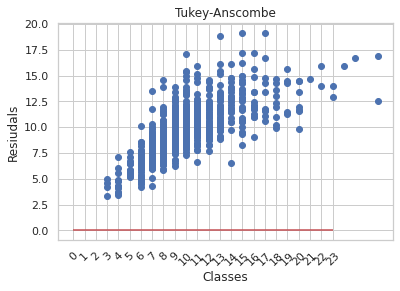

In [5]:
fc.tukey_anscombe(y_test, y_pred)

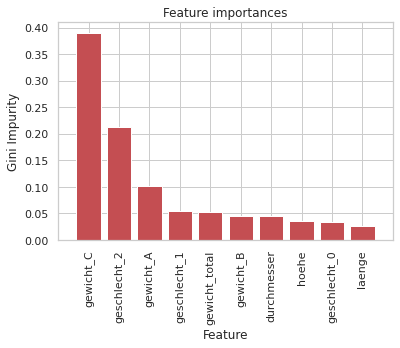

In [6]:
fc.plot_feature_importance_gini(model, X_train)

In [7]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1, scoring='r2').fit(X_test, y_test) 
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.1518 ± 0.1908,gewicht_total
0.9437 ± 0.0764,gewicht_A
0.4457 ± 0.0346,gewicht_C
0.1739 ± 0.0080,durchmesser
0.0859 ± 0.0192,laenge
0.0684 ± 0.0232,gewicht_B
0.0346 ± 0.0116,hoehe
0.0264 ± 0.0122,geschlecht_2
0.0036 ± 0.0024,geschlecht_0
0.0008 ± 0.0030,geschlecht_1
